In [1]:
from windwhisper import windturbines
wind_turbines = {
'Turbine 3': {
     'diameter': 200.0,
               'hub height': 240.0,
               'position': (43.4963381431904, 5.603112659991827),
               'power': 15000.0
 },
    'Turbine 4': {
     'diameter': 200.0,
               'hub height': 240.0,
               'position': (43.48128232314894, 5.608331379310336),
               'power': 15000.0
    }
 #'Turbine 2': {'diameter': 200.0,
 #              'hub height': 240.0,
 #              'position': (55.734249600379336, 9.206526921380098),
 #              'power': 15000.0},
 #'Turbine 3': {'diameter': 200.0,
 #              'hub height': 240.0,
 #              'position': (55.74864349108282, 9.091328259545296),
 #              'power': 15000.0},
 #'Turbine 4': {'diameter': 200.0,
 #              'hub height': 240.0,
 #              'position': (55.7467007615353, 9.170468399818262),
 #              'power': 15000.0}
}


wt = windturbines.WindTurbines(
    wind_turbines=wind_turbines,
)

Bounding box: (5.593112659991827, 5.6183313793103355, 43.47128232314894, 43.5063381431904)
Bounding box dimensions: 3898.034722162254m x 2035.060239709849m


/opt/homebrew/Caskroom/miniforge/base/envs/windwhisper/lib/python3.10/site-packages/rasterio/io.py:140: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  rd = DatasetReader(mempath, driver=driver, sharing=sharing, **kwargs)


In [10]:
(wt.noise_map.euclidian_distance/wt.noise_map.haversine_distances).plot.scatter?

Object `plot.scatter` not found.


In [2]:
wt.noise_map.euclidian_distance

<xarray.DataArray (lat: 100, lon: 100, turbine: 2)>
array([[[2901.19847156, 1658.11754075],
        [2895.56079036, 1642.97388312],
        [2890.05834568, 1627.94902389],
        ...,
        [          nan,           nan],
        [          nan,           nan],
        [          nan,           nan]],

       [[2863.39671737, 1631.95072963],
        [2857.68504393, 1616.56318896],
        [2852.11012144, 1601.29179094],
        ...,
        [          nan,           nan],
        [          nan,           nan],
        [          nan,           nan]],

       [[2825.63799139, 1606.32303621],
        [2819.85041844, 1590.68883182],
        [2814.20113867, 1575.16785637],
        ...,
...
        ...,
        [          nan,           nan],
        [          nan,           nan],
        [          nan,           nan]],

       [[          nan,           nan],
        [          nan,           nan],
        [          nan,           nan],
        ...,
        [          nan,           nan],
        [          nan,           nan],
        [          nan,           nan]],

       [[          nan,           nan],
        [          nan,           nan],
        [          nan,           nan],
        ...,
        [          nan,           nan],
        [          nan,           nan],
        [          nan,           nan]]])
Coordinates:
  * lat      (lat) float64 43.47 43.47 43.47 43.47 ... 43.51 43.51 43.51 43.51
  * lon      (lon) float64 5.593 5.593 5.594 5.594 ... 5.618 5.618 5.618 5.618
  * turbine  (turbine) <U9 'Turbine 3' 'Turbine 4'

In [18]:
from windwhisper.elevation_grid import get_elevation_grid

In [19]:
res = get_elevation_grid(
    latitudes=wt.noise_analysis.lden_map.lat,
    longitudes=wt.noise_analysis.lden_map.lon
)

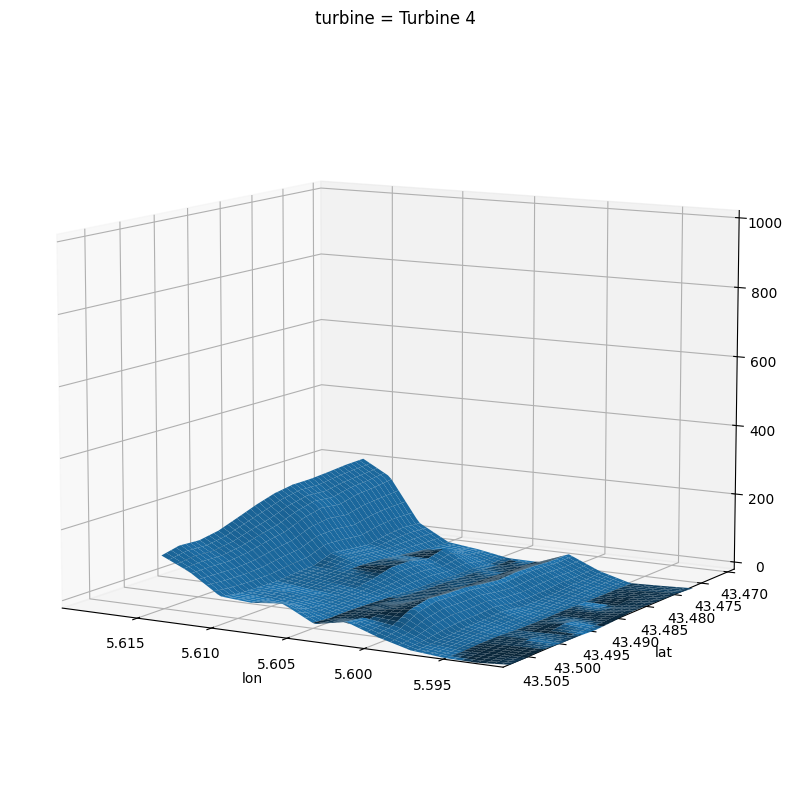

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(0, 1000)

wt.noise_map.relative_elevations.sel(turbine="Turbine 4").plot.surface()


# Set the azimuth and elevation angles
ax.view_init(azim=120, elev=10)

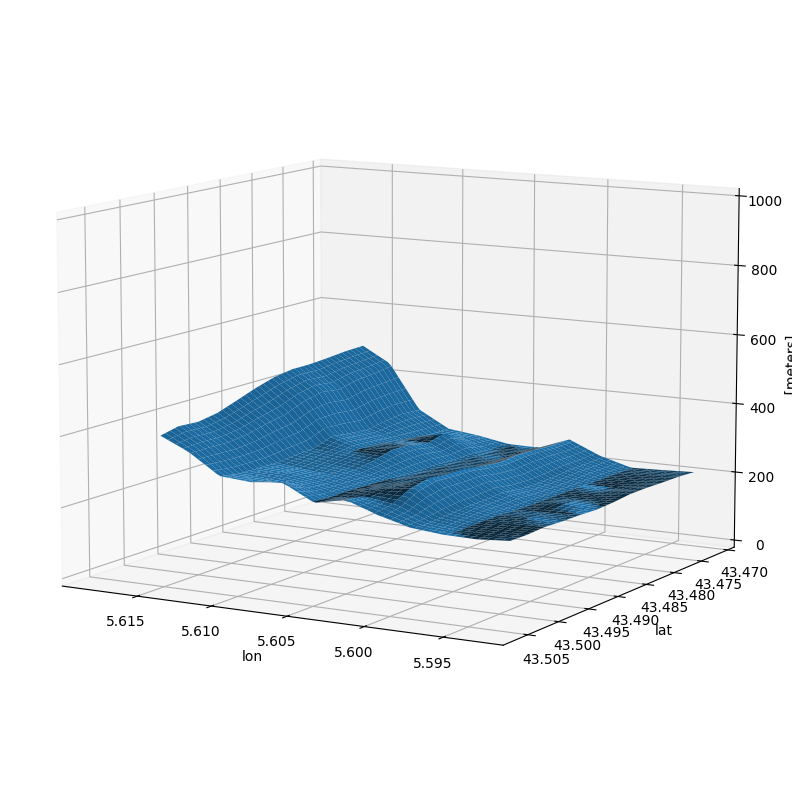

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(0, 1000)

wt.noise_map.elevation_grid.plot.surface()

# Set the azimuth and elevation angles
ax.view_init(azim=120, elev=10)

In [4]:
wt.noise_map.noise_level_at_wind_speeds

<xarray.DataArray (lat: 100, lon: 100, wind_speed: 10)> Size: 800kB
array([[[16.6171564 , 21.77893828, 26.46547401, ..., 28.32286913,
         28.27933748, 28.33079604],
        [16.67992457, 21.84170645, 26.52824218, ..., 28.3856373 ,
         28.34210565, 28.39356421],
        [16.74233022, 21.9041121 , 26.59064783, ..., 28.44804295,
         28.4045113 , 28.45596986],
        ...,
        [17.32373458, 22.48551646, 27.17205219, ..., 29.02944731,
         28.98591566, 29.03737422],
        [17.26383023, 22.42561211, 27.11214784, ..., 28.96954296,
         28.92601131, 28.97746987],
        [17.20327105, 22.36505293, 27.05158866, ..., 28.90898378,
         28.86545213, 28.91691069]],

       [[16.72239576, 21.88417764, 26.57071337, ..., 28.42810849,
         28.38457684, 28.4360354 ],
        [16.78665091, 21.94843279, 26.63496852, ..., 28.49236364,
         28.44883199, 28.50029055],
        [16.85055276, 22.01233464, 26.69887037, ..., 28.55626549,
         28.51273384, 28.5641924 ],
...
        [17.70158037, 22.86336225, 27.54989798, ..., 29.4072931 ,
         29.36376145, 29.41522002],
        [17.63615577, 22.79793765, 27.48447338, ..., 29.3418685 ,
         29.29833685, 29.34979541],
        [17.57015074, 22.73193262, 27.41846835, ..., 29.27586347,
         29.23233182, 29.28379038]],

       [[17.00648781, 22.16826969, 26.85480542, ..., 28.71220054,
         28.66866889, 28.72012746],
        [17.07408955, 22.23587143, 26.92240716, ..., 28.77980228,
         28.73627063, 28.78772919],
        [17.14130824, 22.30309012, 26.98962585, ..., 28.84702097,
         28.80348932, 28.85494788],
        ...,
        [17.5776408 , 22.73942268, 27.42595841, ..., 29.28335353,
         29.23982188, 29.29128044],
        [17.51399459, 22.67577647, 27.3623122 , ..., 29.21970732,
         29.17617567, 29.22763423],
        [17.44976173, 22.61154361, 27.29807934, ..., 29.15547446,
         29.11194281, 29.16340137]]])
Coordinates:
  * lat         (lat) float64 800B 55.61 55.62 55.62 55.62 ... 55.86 55.87 55.87
  * lon         (lon) float64 800B 8.971 8.975 8.979 8.982 ... 9.319 9.323 9.327
    wind_speed  int64 8B 10

In [2]:
wt.analyze_noise()

KeyError: 'time'

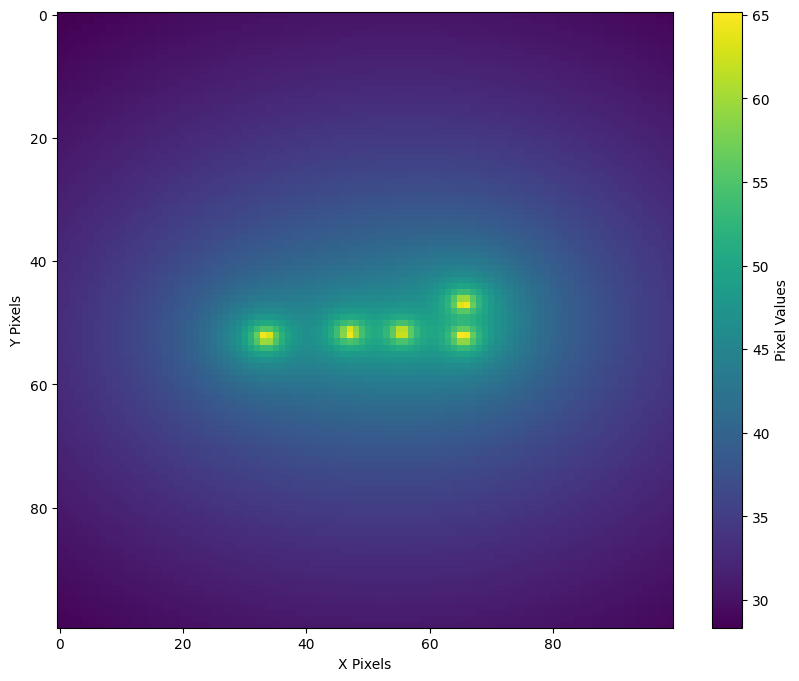

In [8]:


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(wt.noise_map.noise_level_at_mean_wind_speed,)
plt.colorbar(label="Pixel Values")
plt.xlabel("X Pixels")
plt.ylabel("Y Pixels")
plt.grid(False)  # Disable grid for better visualization
plt.show()



{'diameter': 200.0, 'hub height': 240.0, 'position': (55.74840260435069, 9.206243110596287), 'power': 15000.0, 'mean_wind_speed': <xarray.DataArray (variable: 1, hour: 24)> Size: 192B
array([[8.49042591, 8.45353776, 8.42114108, 8.39843077, 8.38134325,
        8.36810302, 8.33310418, 8.22331526, 8.12876122, 8.04690856,
        7.84057425, 7.9245772 , 8.0003331 , 8.10365659, 8.1799269 ,
        8.2322587 , 8.28953808, 8.35799722, 8.45022465, 8.53083595,
        8.57070713, 8.57720734, 8.59737004, 8.55434468]])
Coordinates:
  * hour         (hour) int16 48B 0 1 2 3 4 5 6 7 8 ... 16 17 18 19 20 21 22 23
    longitude    float32 4B 9.25
    latitude     float32 4B 55.75
  * variable     (variable) object 8B 'wind_speed'
    spatial_ref  int64 8B 0
    height       float32 4B 200.0, 'noise_vs_wind_speed': <xarray.DataArray (wind_speed: 10)> Size: 80B
array([ 95.12502152, 100.2868034 , 104.97333913, 106.71415333,
       106.89685369, 106.85981966, 106.84638849, 106.83073425,
       106.787202

KeyError: 'noise_map'

In [3]:
wt.noise_analysis.

{'Turbine 0': <xarray.DataArray ()> Size: 8B
 array(31.85501267)
 Coordinates:
     turbine      <U9 36B 'Turbine 0'
     longitude    float32 4B 9.25
     latitude     float32 4B 55.75
     variable     <U10 40B 'wind_speed'
     spatial_ref  int64 8B 0
     height       float32 4B 200.0,
 'Turbine 1': <xarray.DataArray ()> Size: 8B
 array(34.03367999)
 Coordinates:
     turbine      <U9 36B 'Turbine 1'
     longitude    float32 4B 9.25
     latitude     float32 4B 55.75
     variable     <U10 40B 'wind_speed'
     spatial_ref  int64 8B 0
     height       float32 4B 200.0,
 'Turbine 2': <xarray.DataArray ()> Size: 8B
 array(29.89764439)
 Coordinates:
     turbine      <U9 36B 'Turbine 2'
     longitude    float32 4B 9.25
     latitude     float32 4B 55.75
     variable     <U10 40B 'wind_speed'
     spatial_ref  int64 8B 0
     height       float32 4B 200.0,
 'Turbine 3': <xarray.DataArray ()> Size: 8B
 array(19.60093635)
 Coordinates:
     turbine      <U9 36B 'Turbine 3'
     longi

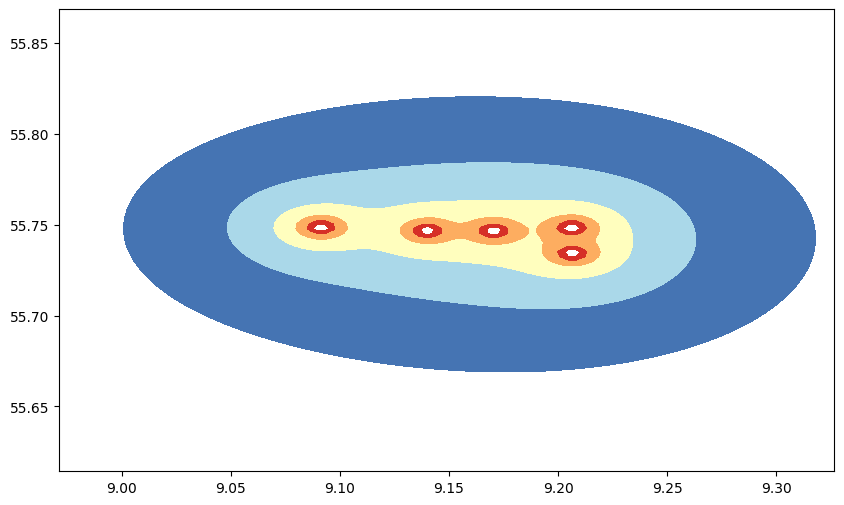

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Define contour levels starting from 35 dB
contour_levels = [35, 40, 45, 50, 55, 60]

# add bounding box
plt.xlim(wt.noise_map.LON.min(), wt.noise_map.LON.max())
plt.ylim(wt.noise_map.LAT.min(), wt.noise_map.LAT.max())

plt.contourf(
    wt.noise_map.LON,  # x-axis, longitude
    wt.noise_map.LAT,  # y-axis, latitude
    wt.noise_map.noise_level_at_mean_wind_speed.sum(dim="wind_speed"),
    levels=contour_levels,
    cmap="RdYlBu_r",
)

In [5]:
wt.noise_map.LAT

array([[55.6142496 , 55.6142496 , 55.6142496 , ..., 55.6142496 ,
        55.6142496 , 55.6142496 ],
       [55.61681924, 55.61681924, 55.61681924, ..., 55.61681924,
        55.61681924, 55.61681924],
       [55.61938887, 55.61938887, 55.61938887, ..., 55.61938887,
        55.61938887, 55.61938887],
       ...,
       [55.86350422, 55.86350422, 55.86350422, ..., 55.86350422,
        55.86350422, 55.86350422],
       [55.86607386, 55.86607386, 55.86607386, ..., 55.86607386,
        55.86607386, 55.86607386],
       [55.86864349, 55.86864349, 55.86864349, ..., 55.86864349,
        55.86864349, 55.86864349]])

In [6]:
wt.wind_turbines["Turbine 1"]['mean_wind_speed'].mean()

<xarray.DataArray ()> Size: 8B
array(8.31060929)
Coordinates:
    longitude    float32 4B 9.25
    latitude     float32 4B 55.75
    spatial_ref  int64 8B 0
    height       float32 4B 200.0

In [7]:
wt.wind_turbines["Turbine 1"]["noise_vs_wind_speed"].interp(
    wind_speed=wt.wind_turbines["Turbine 1"]['mean_wind_speed'].mean()
)

<xarray.DataArray ()> Size: 8B
array(106.85564781)
Coordinates:
    turbine      <U9 36B 'Turbine 1'
    wind_speed   float64 8B 8.311
    longitude    float32 4B 9.25
    latitude     float32 4B 55.75
    spatial_ref  int64 8B 0
    height       float32 4B 200.0

In [8]:
wt.noise_analysis.wind_turbines

{'Turbine 0': {'diameter': 200.0,
  'hub height': 240.0,
  'position': (55.74840260435069, 9.206243110596287),
  'power': 15000.0,
  'mean_wind_speed': <xarray.DataArray (variable: 1, hour: 24)> Size: 192B
  array([[8.49042591, 8.45353776, 8.42114108, 8.39843077, 8.38134325,
          8.36810302, 8.33310418, 8.22331526, 8.12876122, 8.04690856,
          7.84057425, 7.9245772 , 8.0003331 , 8.10365659, 8.1799269 ,
          8.2322587 , 8.28953808, 8.35799722, 8.45022465, 8.53083595,
          8.57070713, 8.57720734, 8.59737004, 8.55434468]])
  Coordinates:
    * hour         (hour) int16 48B 0 1 2 3 4 5 6 7 8 ... 16 17 18 19 20 21 22 23
      longitude    float32 4B 9.25
      latitude     float32 4B 55.75
    * variable     (variable) object 8B 'wind_speed'
      spatial_ref  int64 8B 0
      height       float32 4B 200.0,
  'noise_vs_wind_speed': <xarray.DataArray (wind_speed: 10)> Size: 80B
  array([ 95.12502152, 100.2868034 , 104.97333913, 106.71415333,
         106.89685369, 106.859

In [9]:
wt.noise_analysis.display_listeners_on_map_with_Lden()

Map saved to /Users/romain/Github/windwhisper/dev/lden_map_2024-11-27 17:32:53.427683.html


In [11]:
import xarray as xr
fp = "/Users/romain/GitHub/windwhisper/tests/fixtures/era5_mean_2013-2022_month_by_hour.nc"
a = xr.open_dataset(fp).to_array().mean(dim="month")


In [21]:
fp = "/Users/romain/GitHub/windwhisper/tests/fixtures/ratio_gwa2_era5.nc"
b = xr.open_dataset(fp).to_array()

In [10]:
wt.noise_analysis.listeners

{'Listener 1': {'position': (55.745, 9.170468399818262), 'l_den': 45.4},
 'Listener 2': {'position': (55.746, 9.170468399818262), 'l_den': 53.3},
 'Listener 3': {'position': (55.747, 9.170468399818262), 'l_den': 60.8}}

In [22]:
b.coords

Coordinates:
  * height       (height) int64 50 100 200
  * longitude    (longitude) float64 -180.3 -180.2 -180.2 ... 180.2 180.3 180.3
  * latitude     (latitude) float64 -56.79 -56.76 -56.74 ... 83.86 83.89 83.9
    spatial_ref  int64 ...
  * variable     (variable) object 'ratio_gwa2_era5_mean_WS'

In [23]:
b = b.sel(variable='ratio_gwa2_era5_mean_WS').interp(latitude=a.latitude, longitude=a.longitude, method='linear')

In [24]:
a * b

<xarray.DataArray (variable: 1, hour: 24, height: 3, latitude: 149,
                   longitude: 201)>
array([[[[[ 7.57700205,  7.58048201,  7.60136986, ...,  4.72328138,
            4.88134432,  5.19608402],
          [ 7.57245827,  7.59122705,  7.61798668, ...,  4.974182  ,
            4.80399275,  4.9460392 ],
          [ 7.59161901,  7.61403847,  7.63149309, ...,  5.56415522,
            5.58162118,  5.00120401],
          ...,
          [ 9.20997334,  9.21415806,  9.23839474, ...,  8.8102026 ,
            8.79873466,  8.80672264],
          [ 9.12845325,  9.14609814,  9.17917919, ...,  8.78871632,
            8.79536629,  8.81379509],
          [ 9.04807758,  9.0568285 ,  9.09368229, ...,  8.80537891,
            8.80120754,  8.82213306]],

         [[ 7.87958336,  7.8863759 ,  7.90970945, ...,  4.89041519,
            5.06175613,  5.38514709],
          [ 7.88147116,  7.89979601,  7.92842627, ...,  5.17163634,
            4.98083067,  5.13328791],
          [ 7.90342188,  7.92833376,  7.9472003 , ...,  5.8911676 ,
            5.80714914,  5.18693066],
...
          [ 9.75083542,  9.75677395,  9.78140354, ...,  9.29867458,
            9.29284096,  9.30517292],
          [ 9.66432095,  9.6780901 ,  9.70828915, ...,  9.28414822,
            9.29095364,  9.31173325],
          [ 9.5805521 ,  9.58299541,  9.61536217, ...,  9.28915691,
            9.29223061,  9.3150053 ]],

         [[ 8.18252468,  8.19685078,  8.21693611, ...,  4.81672812,
            5.15096378,  5.38833618],
          [ 8.1947155 ,  8.22040462,  8.25386524, ...,  5.25163411,
            5.1205864 ,  5.16389418],
          [ 8.24002934,  8.26283169,  8.28455067, ...,  6.28039744,
            5.9498377 ,  5.2401433 ],
          ...,
          [10.16035843, 10.19564152, 10.22818947, ...,  9.62752724,
            9.61716843,  9.6105938 ],
          [10.07364559, 10.10641956, 10.13845921, ...,  9.61593246,
            9.61970139,  9.62900639],
          [ 9.99466801, 10.02955818, 10.06328869, ...,  9.63112164,
            9.63515091,  9.64127827]]]]])
Coordinates:
  * hour         (hour) int16 0 1 2 3 4 5 6 7 8 9 ... 15 16 17 18 19 20 21 22 23
  * longitude    (longitude) float32 -15.0 -14.75 -14.5 ... 34.5 34.75 35.0
  * height       (height) float32 50.0 100.0 200.0
  * latitude     (latitude) float32 35.0 35.25 35.5 35.75 ... 71.5 71.75 72.0
  * variable     (variable) object 'wind_speed'
    spatial_ref  int64 0

In [17]:
wt.na.listeners

AttributeError: 'WindTurbines' object has no attribute 'na'

In [10]:
wt.na.analyze_and_calculate_lden()

({'Listener 1': 20.6, 'Listener 2': 24.8, 'Listener 3': 15.7},
 [{'name': 'Listener 1', 'position': (47.3769, 8.5517), 'L_den': 20.6},
  {'name': 'Listener 2', 'position': (47.3869, 8.5617), 'L_den': 24.8},
  {'name': 'Listener 3', 'position': (47.3461, 8.5175), 'L_den': 15.7}],
 {'Listener 1': {'day': <xarray.DataArray (time: 17544)>
   array([6.98970004, 6.98970004, 6.02075442, ..., 6.47578564, 5.59969866,
          5.62527353])
   Coordinates:
     * time        (time) datetime64[ns] 2016-01-01T07:00:00 ... 2017-12-31T18:3...
       turbine     <U9 'Turbine 5'
       wind_speed  (time) float32 1.82 1.132 1.379 1.973 ... 5.641 6.514 6.612,
   'evening': <xarray.DataArray (time: 5848)>
   array([ 9.73295559, 10.44156253, 10.51216264, ..., 10.31464356,
          13.72737667, 14.10303091])
   Coordinates:
     * time        (time) datetime64[ns] 2016-01-01T19:00:00 ... 2017-12-31T22:3...
       turbine     <U9 'Turbine 5'
       wind_speed  (time) float32 3.207 3.467 3.272 3.037 ... 4.9

In [3]:
wt.fetch_noise_map()

In [4]:
wt.noise_map.plot_noise_map()

interactive(children=(FloatSlider(value=7.0, description='Wind Speed (m/s):', max=12.0, min=3.0, step=1.0), Ou…

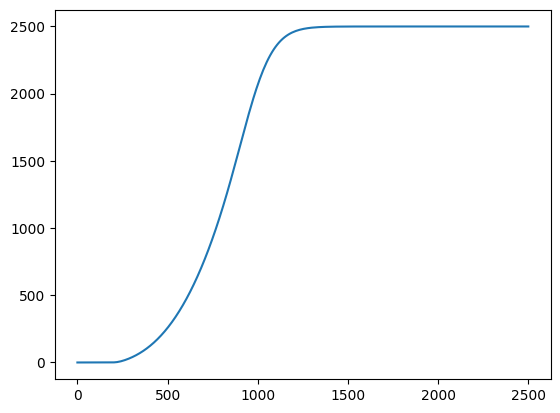

In [10]:
import matplotlib.pyplot as plt
plt.plot(wt.power_curves["Turbine 1"])

In [5]:
wt.noise

<xarray.DataArray (turbine: 5, wind_speed: 10)>
array([[ 93.04701274,  95.25751182, 100.77676995, 104.09258867,
        105.24194058, 105.22798734, 105.42737188, 105.59028712,
        105.56246753, 105.48062149],
       [ 90.64894133,  94.27705718,  99.5009827 , 103.08752176,
        105.05589095, 105.2182466 , 105.14455546, 105.26325801,
        104.94217224, 104.81114292],
       [ 91.53342043,  95.76464334, 100.3954427 , 104.79345528,
        106.17289338, 106.18918152, 106.04498142, 106.16726095,
        106.36459259, 106.41410158],
       [ 88.15532518,  95.41237277, 100.59795471, 102.82742421,
        104.21421841, 104.40742185, 104.81934364, 105.0178005 ,
        104.85086077, 104.95646585],
       [ 92.52679739,  97.62731695, 102.68738032, 104.87426586,
        106.34629352, 106.98630498, 107.09505164, 106.92266991,
        106.90167791, 106.99546025]])
Coordinates:
  * turbine     (turbine) <U9 'Turbine 1' 'Turbine 2' ... 'Turbine 5'
  * wind_speed  (wind_speed) float64 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0

In [6]:
wt.noise_map.plot_noise_map()

interactive(children=(FloatSlider(value=7.0, description='Wind Speed (m/s):', max=12.0, min=3.0, step=1.0), Ou…

In [7]:
wt.noise_map.plot_on_map()

In [6]:
wt.wind_turbines

[{'name': 'Turbine 1',
  'power': 2500.0,
  'diameter': 100.0,
  'hub height': 80.0,
  'position': (47.34606, 8.508267)},
 {'name': 'Turbine 2',
  'power': 3000.0,
  'diameter': 105.0,
  'hub height': 85.0,
  'position': (47.3869, 8.5517)}]

In [7]:
wt.listeners

[{'name': 'Listener 1', 'position': (47.3769, 8.5517)},
 {'name': 'Listener 2', 'position': (47.3869, 8.5617)},
 {'name': 'Listener 3', 'position': (47.346188367055674, 8.507587721502468)}]

In [ ]:
n.whatsmyname()